In [4]:
# Save the mean intensity and propagated error to a file
def save(r1, r2, stitched):
    import os
    import numpy as np

    # make directory if it doesn't exist
    os.makedirs('sub_merged', exist_ok=True)

    #save data from mantid workspace to .dat file

    np.savetxt(
        f'sub_merged/sub_merged_{r1:04d}_to_{r2:04d}.dat',
        np.column_stack((stitched.readX(0), stitched.readY(0), stitched.readE(0))),
        header="q intensity propagated_error"
    )
    print(f"sub_merged data frames {r1:04d} to {r2:04d}")

# # Do stitching in Mantid
https://docs.mantidproject.org/nightly/algorithms/Stitch1D-v3.html
https://docs.mantidproject.org/nightly/concepts/MatrixWorkspace.html#matrixworkspace

Code for generating plot is commented out now to not create clutter, but can be turned on to compare before and after stitching

sub_merged data frames 0041 to 0079
sub_merged data frames 0081 to 0119
sub_merged data frames 0121 to 0159
sub_merged data frames 0161 to 0199
sub_merged data frames 0201 to 0239
sub_merged data frames 0241 to 0279
sub_merged data frames 0281 to 0319
sub_merged data frames 0321 to 0359
sub_merged data frames 0361 to 0399
sub_merged data frames 0401 to 0439
sub_merged data frames 0441 to 0479
sub_merged data frames 0481 to 0519
sub_merged data frames 0521 to 0559
sub_merged data frames 0561 to 0599
sub_merged data frames 0601 to 0639
sub_merged data frames 0641 to 0679
sub_merged data frames 0681 to 0719
sub_merged data frames 0721 to 0759
sub_merged data frames 0761 to 0799


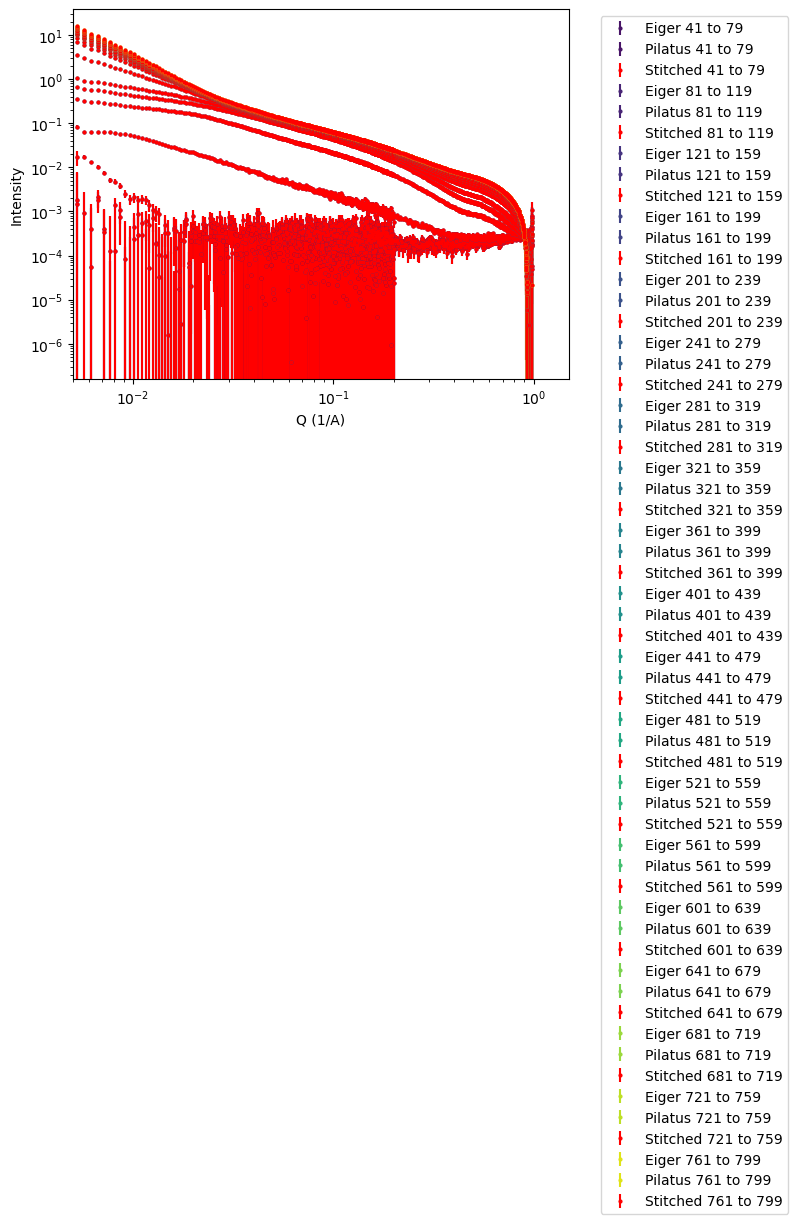

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mantid.simpleapi import *

shots = [(41, 79),(81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), 
         (641, 679), (681, 719), (721, 759), (761, 799)]


plt.figure()
cmap = plt.get_cmap('viridis')

for r1, r2 in shots:
    # multiplication factor on eiger 0.0217 correct for differences between data processed on jupyter 20250416 and data from Ann T. 
    # multiplication on pilatus is the factor between pilatus and eiger data 
    data_eiger = np.loadtxt(f'eiger_sub/subtracted_data_{r1:04d}_to_{r2:04d}.dat')
    q_values = data_eiger[:, 0]
    intensity_eiger = data_eiger[:, 1]*0.0217
    I_error_eiger = data_eiger[:, 2]*0.0217

    # Filter data to include only q values below 0.2, which is around the cutoff where eiger data becomes noisy
    mask = q_values < 0.2
    q_values = q_values[mask]
    intensity_eiger = intensity_eiger[mask]
    I_error_eiger = I_error_eiger[mask]

    ws1 = CreateWorkspace(dataX=q_values, dataY=intensity_eiger, dataE=I_error_eiger)

    data_pilatus = np.loadtxt(f'pilatus_sub/subtracted_data_{r1:04d}_to_{r2:04d}.dat')
    q_values_pilatus = data_pilatus[:, 0]
    intensity_pilatus = data_pilatus[:, 1]*0.0217*0.0054
    I_error_pilatus = data_pilatus[:, 2]*0.0217*0.0054
    ws2 = CreateWorkspace(dataX=q_values_pilatus, dataY=intensity_pilatus, dataE=I_error_pilatus)

    plt.errorbar(ws1.readX(0), ws1.readY(0), yerr=ws1.readE(0), fmt='o', markersize = 2 ,color=cmap(r1/800), label=f'Eiger {r1} to {r2}')
    plt.errorbar(ws2.readX(0), ws2.readY(0), yerr=ws2.readE(0), fmt='o', markersize = 2 ,color=cmap(r1/800), label=f'Pilatus {r1} to {r2}')

    stitched, scale = Stitch1D(LHSWorkspace=ws1, RHSWorkspace=ws2, UseManualScaleFactor = True, StartOverlap=0.08, EndOverlap=0.5)
    plt.errorbar(stitched.readX(0), stitched.readY(0), yerr=stitched.readE(0), fmt='o', markersize = 2 ,color='red', label=f'Stitched {r1} to {r2}')


    save(r1, r2, stitched) #save data if wanted



plt.xscale('log')
plt.yscale('log')

plt.xlim(0.005, 1.5)


plt.xlabel('Q (1/A)')
plt.ylabel('Intensity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')




In [ ]:
#clean any special characters or zero from the data
import numpy as np
import matplotlib.pyplot as plt


shots = [(41, 79),(81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), 
         (641, 679), (681, 719), (721, 759), (761, 799)]



for r1, r2 in shots:

    data = np.loadtxt(f'sub_merged/sub_merged_{r1:04d}_to_{r2:04d}.dat')
    # Filter rows where any column contains zeroes
    data = data[~np.any(data == 0, axis=1)]

    # Optionally, handle rows with special characters (e.g., NaN or Inf)
    data = data[~np.isnan(data).any(axis=1)]  # Remove rows with NaN
    data = data[~np.isinf(data).any(axis=1)]  # Remove rows with Inf
    import numpy as np

    os.makedirs('nozero_sub_merged', exist_ok=True)

    # Save the data to a .dat file
    np.savetxt(
        f'nozero_sub_merged/{r1:04d}_{r2:04d}.dat', # Output file name
        data,               # Data to save
        header="q I Ierr",  # Header for the file
    )
    print(f"Data saved as {r1:04d}_{r2:04d}.dat")


Data saved as processed_0041_to_0079.dat
Data saved as processed_0081_to_0119.dat
Data saved as processed_0121_to_0159.dat
Data saved as processed_0161_to_0199.dat
Data saved as processed_0201_to_0239.dat
Data saved as processed_0241_to_0279.dat
Data saved as processed_0281_to_0319.dat
Data saved as processed_0321_to_0359.dat
Data saved as processed_0361_to_0399.dat
Data saved as processed_0401_to_0439.dat
Data saved as processed_0441_to_0479.dat
Data saved as processed_0481_to_0519.dat
Data saved as processed_0521_to_0559.dat
Data saved as processed_0561_to_0599.dat
Data saved as processed_0601_to_0639.dat
Data saved as processed_0641_to_0679.dat
Data saved as processed_0681_to_0719.dat
Data saved as processed_0721_to_0759.dat
Data saved as processed_0761_to_0799.dat


# # Plot stitched data

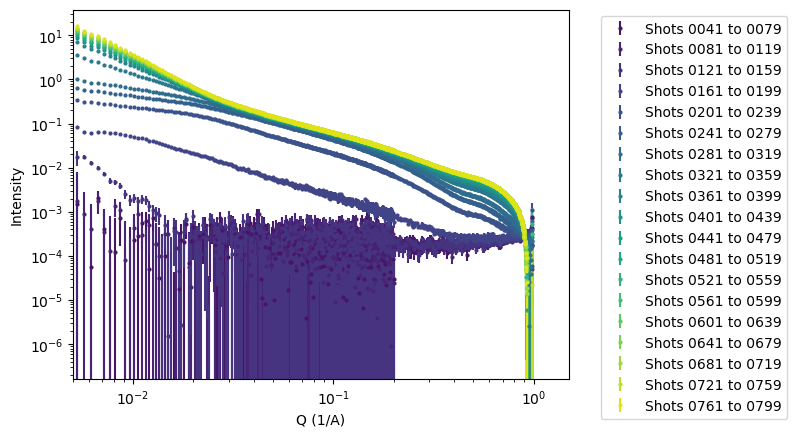

In [7]:
import numpy as np
import matplotlib.pyplot as plt


shots = [(41, 79),(81, 119), (121, 159), (161, 199), (201, 239), (241, 279), (281, 319), 
         (321, 359), (361, 399), (401, 439), (441, 479), (481, 519), (521, 559), (561, 599), (601, 639), 
         (641, 679), (681, 719), (721, 759), (761, 799)]


plt.figure()
cmap = plt.get_cmap('viridis')

for r1, r2 in shots:

    data = np.loadtxt(f'sub_merged/sub_merged_{r1:04d}_to_{r2:04d}.dat')
    q_values = data[:, 0]
    intensity = data[:, 1]
    I_error = data[:, 2]
    plt.errorbar(q_values, intensity, yerr= I_error , fmt = 'o', markersize = 2 , color=cmap(r1 / 800), label=f'Shots {r1:04d} to {r2:04d}')
    


plt.xscale('log')
plt.yscale('log')

plt.xlim(0.005, 1.5)


plt.xlabel('Q (1/A)')
plt.ylabel('Intensity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


